<a href="https://colab.research.google.com/github/Indhumathi-ML/MLcasestudy/blob/master/Human_Resource_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#open the local file
#data_df = pd.read_csv('./var/Untitled Folder/hr_data.csv')
#data_df.head()
filename = "/content/drive/My Drive/Colab Notebooks/Casestudy1/hr_data.csv"
data_df = pd.read_csv(filename)
data_df.head()


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [ ]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [ ]:
data_df.select_dtypes(exclude=['int','float']).columns

Index(['department', 'salary'], dtype='object')

In [ ]:
#Display Categorical columns values
print(data_df['department'].unique())
print(data_df['salary'].unique())


['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [ ]:
len(data_df)

14999

In [ ]:
len(data_df.columns)

9

In [ ]:
data_df.shape

(14999, 9)

In [ ]:
hr_df=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Casestudy1/satisfactionevaluation.xlsx')

In [ ]:
hr_df.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [ ]:
print(data_df.columns)
print(hr_df.columns)

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')
Index(['EMPLOYEE #', 'satisfaction_level', 'last_evaluation'], dtype='object')


In [ ]:
#hr_df.rename({hr_df.columns[0]:data_df.columns[0]},axis=1,inplace=True)
#hr_df.columns

In [ ]:
#Merge or joins the tables
main_df = data_df.set_index('employee_id').join(hr_df.set_index('EMPLOYEE #'))
#main_df = data_df.merge(hr_df,on=hr_df.columns[0])
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [ ]:
#hr_df.isnull()
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [ ]:
#filling the blank values
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [ ]:
#main_df[main_df.employee_id == 3794]
main_df.loc[main_df['employee_id']== 3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [ ]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [ ]:
#removing employee id
main_df.columns


Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary', 'satisfaction_level', 'last_evaluation'],
      dtype='object')

In [ ]:
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [ ]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [ ]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [ ]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

No handles with labels found to put in legend.


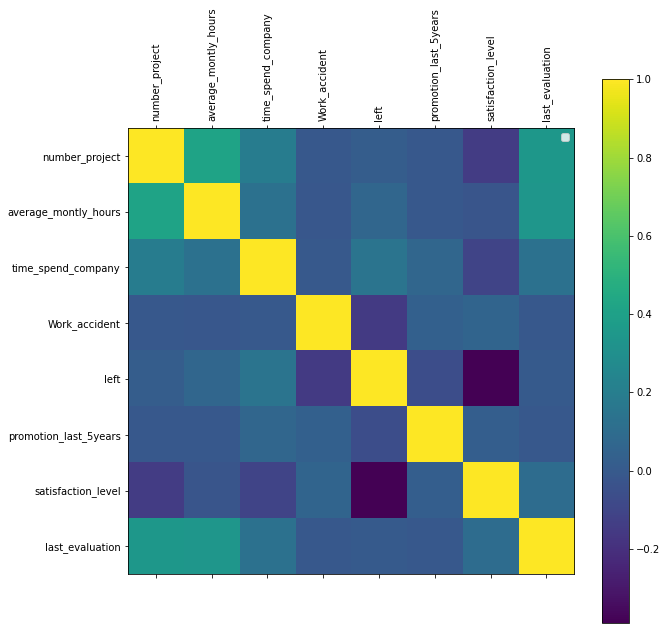

In [ ]:
#displying correlation matrix

def plot_corr(df,size=10):
    corr = df.corr()
    fig,ax = plt.subplots(figsize=(size,size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)),corr.columns)
    
plot_corr(main_df_final)

In [ ]:
#Data cleaning and prepartion
#Preparing dataset for ML
#Encoding Categorical data
Categorial=['department','salary']
main_df_final=pd.get_dummies(main_df_final,columns=Categorial,drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
len(main_df_final.columns)

19

In [ ]:
#How many employees in the dataset on left
len(main_df_final.loc[main_df_final['left']==1])

3571

In [ ]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
#preparing our dataset for machine learning
from sklearn.model_selection import train_test_split
#remove the label values form training data
X = main_df_final.drop(['left'],axis=1).values

#assigned those label values to our y dataset
Y = main_df_final['left'].values

In [ ]:
#split into trian and test data
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3)

In [ ]:
#Normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
df_train =pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.154460,-0.058587,-0.341415,-0.412232,-0.148322,-0.090892,1.547677,-0.234895,-0.228506,-0.225023,-0.213816,-0.24858,3.864158,-0.615407,-0.41318,-0.471569,1.030270,-0.867277
1,0.154460,0.420934,-1.019785,-0.412232,-0.148322,-0.171282,1.606325,-0.234895,-0.228506,-0.225023,-0.213816,-0.24858,-0.258789,-0.615407,2.42025,-0.471569,-0.970619,1.153034
2,-1.469654,-0.917730,-0.341415,2.425817,-0.148322,-0.653626,-1.208792,-0.234895,-0.228506,-0.225023,-0.213816,-0.24858,-0.258789,1.624940,-0.41318,-0.471569,-0.970619,1.153034
3,-0.657597,-2.016633,0.336956,2.425817,-0.148322,-0.171282,1.606325,-0.234895,-0.228506,-0.225023,-0.213816,-0.24858,-0.258789,-0.615407,-0.41318,2.120580,1.030270,-0.867277
4,0.154460,-1.397251,1.015327,-0.412232,-0.148322,1.356141,-0.798254,-0.234895,-0.228506,-0.225023,-0.213816,-0.24858,-0.258789,-0.615407,2.42025,-0.471569,1.030270,-0.867277


In [ ]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,5.727842e-16,-2.154937e-16,1.386198e-15,1.852747e-15,5.561690e-16,2.988191e-14,2.649828e-14,-2.506118e-16,2.762445e-16,1.132905e-16,2.018472e-16,2.587013e-16,-2.663203e-16,3.256964e-17,1.311774e-15,2.124545e-15,3.910472e-17,9.497435e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.469654e+00,-2.096553e+00,-1.019785e+00,-4.122322e-01,-1.483220e-01,-2.100659e+00,-2.088516e+00,-2.348955e-01,-2.285057e-01,-2.250232e-01,-2.138156e-01,-2.485801e-01,-2.587886e-01,-6.154073e-01,-4.131805e-01,-4.715691e-01,-9.706191e-01,-8.672771e-01
25%,-6.575971e-01,-8.977497e-01,-3.414146e-01,-4.122322e-01,-1.483220e-01,-6.938218e-01,-9.155508e-01,-2.348955e-01,-2.285057e-01,-2.250232e-01,-2.138156e-01,-2.485801e-01,-2.587886e-01,-6.154073e-01,-4.131805e-01,-4.715691e-01,-9.706191e-01,-8.672771e-01
50%,1.544603e-01,-3.860706e-02,-3.414146e-01,-4.122322e-01,-1.483220e-01,1.100851e-01,2.282152e-02,-2.348955e-01,-2.285057e-01,-2.250232e-01,-2.138156e-01,-2.485801e-01,-2.587886e-01,-6.154073e-01,-4.131805e-01,-4.715691e-01,-9.706191e-01,-8.672771e-01
75%,9.665176e-01,8.804758e-01,3.369563e-01,-4.122322e-01,-1.483220e-01,8.336013e-01,9.025456e-01,-2.348955e-01,-2.285057e-01,-2.250232e-01,-2.138156e-01,-2.485801e-01,-2.587886e-01,1.624940e+00,-4.131805e-01,-4.715691e-01,1.030270e+00,1.153034e+00
max,2.590632e+00,2.179180e+00,4.407182e+00,2.425817e+00,6.742088e+00,1.557118e+00,1.664973e+00,4.257213e+00,4.376258e+00,4.443986e+00,4.676926e+00,4.022848e+00,3.864158e+00,1.624940e+00,2.420250e+00,2.120580e+00,1.030270e+00,1.153034e+00


In [ ]:
#Lets Train Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, Y_train)

prediction = model.predict(X_test)

In [ ]:
print ("Accuracy : {0:.2f}%".format(100*accuracy_score(prediction, Y_test))) 
print(confusion_matrix(Y_test, prediction))
print(classification_report(Y_test, prediction))

Accuracy : 78.38%
[[3147  252]
 [ 721  380]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3399
           1       0.60      0.35      0.44      1101

    accuracy                           0.78      4500
   macro avg       0.71      0.64      0.65      4500
weighted avg       0.76      0.78      0.76      4500



In [ ]:
#Let's Try Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction = model.predict(X_test)
score = model.score(X_test, Y_test)

print ("Accuracy : {0:.2f}%".format(100*accuracy_score(prediction, Y_test)))
print(confusion_matrix(Y_test, prediction))
print(classification_report(Y_test, prediction))

Accuracy : 98.78%
[[3396    3]
 [  52 1049]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3399
           1       1.00      0.95      0.97      1101

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



can make deep learning model

In [ ]:
%tensorflow_version 2.x


In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform",activation= "relu",input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform",activation= "sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#start training our classifier
batch_size=10
epochs=25

history = model.fit(X_train,
                    Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Epoch 1/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4410 - accuracy: 0.7644 - val_loss: 0.3619 - val_accuracy: 0.7553
Epoch 2/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3226 - accuracy: 0.8384 - val_loss: 0.3051 - val_accuracy: 0.8764
Epoch 3/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2831 - accuracy: 0.9009 - val_loss: 0.2726 - val_accuracy: 0.9129
Epoch 4/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2603 - accuracy: 0.9150 - val_loss: 0.2546 - val_accuracy: 0.9193
Epoch 5/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2462 - accuracy: 0.9211 - val_loss: 0.2436 - val_accuracy: 0.9220
Epoch 6/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2364 - accuracy: 0.9237 - val_loss: 0.2315 - val_accuracy: 0.9262
Epoch 7/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2282 - accuracy: 0.9268 - val_loss: 0.2216 - val_accuracy:

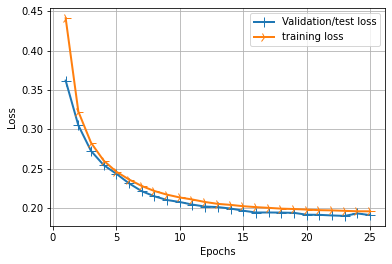

In [ ]:
#plotting for loss data
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs,val_loss_values,label='Validation/test loss')
line2 = plt.plot(epochs,loss_values,label='training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


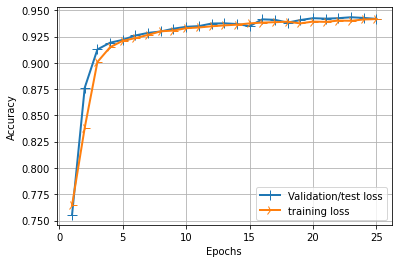

In [ ]:
#plotting our accuracy chart
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs,val_acc_values,label='Validation/test loss')
line2 = plt.plot(epochs,acc_values,label='training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

Deeper Model

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

#Hidden Layer 1
model2.add(Dense(100,activation= "relu",input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape = None,seed= None))

#Hidden Layer 2
model2.add(Dense(100,activation= "relu",input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape = None,seed= None))

model2.add(Dense(1,activation="sigmoid"))
model2.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               1900      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 12,101
Trainable params: 12,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
#start training our classifier
batch_size=10
epochs=25

history = model2.fit(X_train,
                    Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))

score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Epoch 1/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1943 - accuracy: 0.9539 - val_loss: 0.1804 - val_accuracy: 0.9573
Epoch 2/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1956 - accuracy: 0.9512 - val_loss: 0.1802 - val_accuracy: 0.9551
Epoch 3/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1922 - accuracy: 0.9542 - val_loss: 0.1881 - val_accuracy: 0.9607
Epoch 4/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1912 - accuracy: 0.9560 - val_loss: 0.1869 - val_accuracy: 0.9609
Epoch 5/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1885 - accuracy: 0.9563 - val_loss: 0.1744 - val_accuracy: 0.9611
Epoch 6/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1951 - accuracy: 0.9537 - val_loss: 0.2271 - val_accuracy: 0.9311
Epoch 7/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1920 - accuracy: 0.9557 - val_loss: 0.1819 - val_accuracy: